In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV


In [2]:
train_data = pd.read_csv("imaged/emnist-letters-train.csv") 
test_data = pd.read_csv("imaged/emnist-letters-test.csv")

In [3]:
train_data.shape

(88800, 785)

In [4]:
test_data.shape

(14799, 785)

In [5]:
train_data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column776,Column777,Column778,Column779,Column780,Column781,Column782,Column783,Column784,Column785
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.isnull().sum().head(10)

Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
dtype: int64

In [8]:
test_data.isnull().sum().head(10)

1      0
0      0
0.1    0
0.2    0
0.3    0
0.4    0
0.5    0
0.6    0
0.7    0
0.8    0
dtype: int64

In [9]:
label = list(np.sort(train_data['Column1'].unique()))
print(label)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


Text(0.5, 1.0, 'NUmber of letter classes')

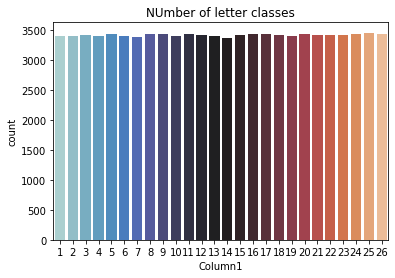

In [11]:
plt.plot(figure = (16,10))
g = sns.countplot( train_data["Column1"], palette = 'icefire')
plt.title('NUmber of letter classes')
# train_data.Column1.astype('category').value_counts()

In [2]:
# a = train_data.iloc[3, 1:]
# a.shape
# a = a.values.reshape(28,28)
# plt.imshow(a, cmap='gray')
# plt.title("O")

In [14]:
# round(train_data.drop('Column1', axis=1).mean(), 2)

In [43]:
y = train_data['Column1'].head(10000)
X = train_data.drop(columns = 'Column1').head(10000)
print(train_data.shape)

(88800, 785)


In [44]:

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (10000, 784)
test_data: (14799, 785)


In [45]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1 ,random_state = 10)

In [46]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

C:\Users\csAbd\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
prediction = model.predict(X_test)

In [48]:
model.predict(X_test[2].reshape(1,-1))

array([23], dtype=int64)

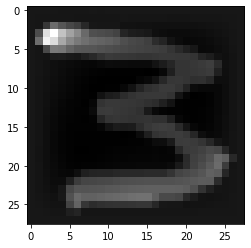

In [49]:
a = X_test[2].reshape(28,28)
plt.imshow(a, cmap='gray')

In [50]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=prediction), "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=prediction))

accuracy: 0.784 

[[30  0  0  0  0  0  3  0  0  0  0  0  0  1  1  0  1  1  0  0  1  0  2  0
   0  0]
 [ 1 27  0  0  0  0  2  1  0  0  0  4  0  0  1  0  0  0  0  0  0  0  0  0
   0  1]
 [ 0  0 32  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0
   0  0]
 [ 2  1  0 28  0  0  0  0  0  2  1  0  0  0  0  0  0  0  0  0  1  0  3  0
   0  0]
 [ 1  3  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0]
 [ 0  0  0  0  0 24  2  0  0  0  0  0  0  0  0  6  0  1  0  2  0  0  1  0
   0  0]
 [ 1  4  0  1  0  0 24  0  0  0  0  0  0  0  0  1  6  0  1  0  0  0  3  0
   0  0]
 [ 0  1  0  0  0  0  0 33  0  0  4  1  0  2  0  0  0  1  0  0  0  0  1  0
   0  0]
 [ 0  1  0  0  0  0  1  0 24  3  0  9  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  1  0  0  0  0  0 32  0  2  0  0  0  0  0  0  0  0  0  1  2  0
   0  0]
 [ 0  1  0  0  0  0  0  2  0  0 33  0  1  0  0  0  0  0  0  1  0  0  3  2
   0  0]
 [ 0  0  1  0  0  0  0  0 11  0  0 26  0  0  0  0  0  0  0  0  0  0  